In [ ]:
# Import Libraries

import pandas as pd
import numpy as np

import zipfile

import math

from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Unzip the archive

local_zip = '/content/drive/MyDrive/database.csv.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [ ]:
df = pd.read_csv('/content/database.csv')
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [ ]:
df.shape

(23412, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,23412.0,1.679033,30.113183,-77.080000,-18.65300,-3.5685,26.19075,86.005
Longitude,23412.0,39.639961,125.511959,-179.997000,-76.34975,103.9820,145.02625,179.998
Depth,23412.0,70.767911,122.651898,-1.100000,14.52250,33.0000,54.00000,700.000
Depth Error,4461.0,4.993115,4.875184,0.000000,1.80000,3.5000,6.30000,91.295
Depth Seismic Stations,7097.0,275.364098,162.141631,0.000000,146.00000,255.0000,384.00000,934.000
Magnitude,23412.0,5.882531,0.423066,5.500000,5.60000,5.7000,6.00000,9.100
Magnitude Error,327.0,0.071820,0.051466,0.000000,0.04600,0.0590,0.07550,0.410
Magnitude Seismic Stations,2564.0,48.944618,62.943106,0.000000,10.00000,28.0000,66.00000,821.000
Azimuthal Gap,7299.0,44.163532,32.141486,0.000000,24.10000,36.0000,54.00000,360.000
Horizontal Distance,1604.0,3.992660,5.377262,0.004505,0.96875,2.3195,4.72450,37.874


### **Data Cleaning**

In [ ]:
date_len = df.Date.str.len()
date_len.value_counts()

10    23409
24        3
Name: Date, dtype: int64

In [ ]:
indices = np.where([date_len == 24])[1]
print('Indices with corrupted data:', indices)
df.loc[indices]

Indices with corrupted data: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [ ]:
time_len = df.Time.str.len()
time_len.value_counts()

8     23409
24        3
Name: Time, dtype: int64

In [ ]:
df.loc[3378, ['Date','Time']] = ['02/23/1975', '02:58:41']
df.loc[7512, ['Date','Time']] = ['04/28/1985', '02:53:41']
df.loc[20650, ['Date','Time']] = ['03/13/2011', '02:23:34']

In [ ]:
# Combine the 'Date' and 'Time' columns
df['Datetime'] = df['Date'].astype(str) + ' ' + df['Time'].astype(str)

# Convert the new column to a datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%m/%d/%Y %H:%M:%S')

columns = df.columns.tolist() # This code positions 'Datetime' in the first index
columns.remove('Datetime')
columns.insert(0, 'Datetime')
df = df.reindex(columns, axis=1)

df['Datetime'].head()

0   1965-01-02 13:44:18
1   1965-01-04 11:29:49
2   1965-01-05 18:05:58
3   1965-01-08 18:49:43
4   1965-01-09 13:32:50
Name: Datetime, dtype: datetime64[ns]

In [ ]:
df['Datetime'].min(), df['Datetime'].max()

(Timestamp('1965-01-02 13:44:18'), Timestamp('2016-12-30 20:08:28'))

In [ ]:
df['Type'].value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

In [ ]:
df1 = df.copy

In [ ]:
df = df.set_index('Datetime')

df = df.drop(['Date','Time'], axis=1)
df.head(3)

,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
Datetime,,,,,,,,,,,,,,,,,,,
1965-01-02 13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-04 11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-05 18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic


In [ ]:
# Find the columns with null values and their percentage

null_cols = df.columns[df.isnull().any()].tolist()
null_percentages = [np.round(100 * df[col].isnull().mean(), 2) for col in null_cols]

# Print the results
for col, percentage in zip(null_cols, null_percentages):
    print(f"{col}: {percentage}%")

Depth Error: 80.95%
Depth Seismic Stations: 69.69%
Magnitude Type: 0.01%
Magnitude Error: 98.6%
Magnitude Seismic Stations: 89.05%
Azimuthal Gap: 68.82%
Horizontal Distance: 93.15%
Horizontal Error: 95.06%
Root Mean Square: 25.88%


All variables except Magnitude Type that have null values need to be dropped because filling them would make our analysis unreliable.

In [ ]:
# Drop columns

cols_to_drop = [col for col in null_cols if col != 'Magnitude Type'] +['ID','Source','Location Source','Magnitude Source','Status'] # ID, sources and status do not add much information for analysis
df = df.drop(cols_to_drop, axis=1)
df.head(2)

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type
Datetime,,,,,,
1965-01-02 13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW
1965-01-04 11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW


In [ ]:
mode = df['Magnitude Type'].mode()[0]

# Fill missing values in the column with the mode
df['Magnitude Type'] = df['Magnitude Type'].fillna(mode)

In [ ]:
# Dropping duplicates

df = df[~df.index.duplicated(keep=False)]

### **Exploratory Analysis**

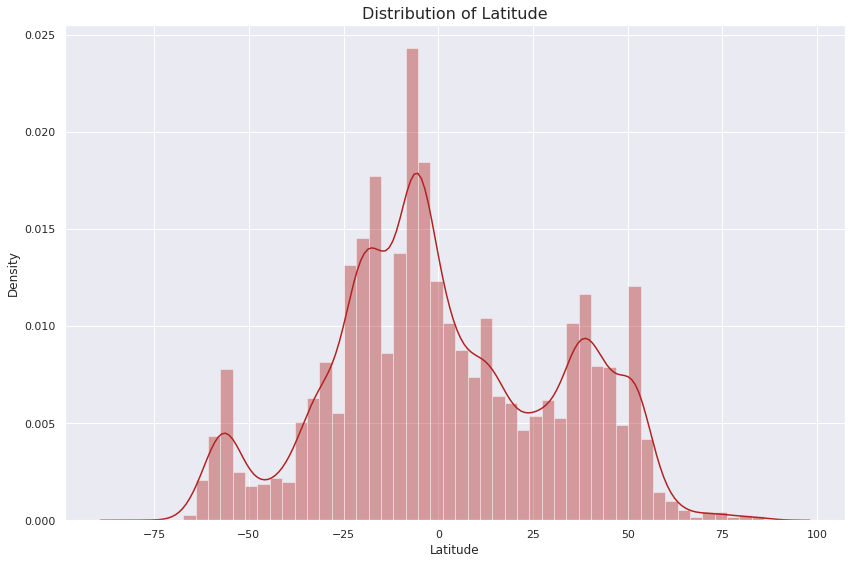

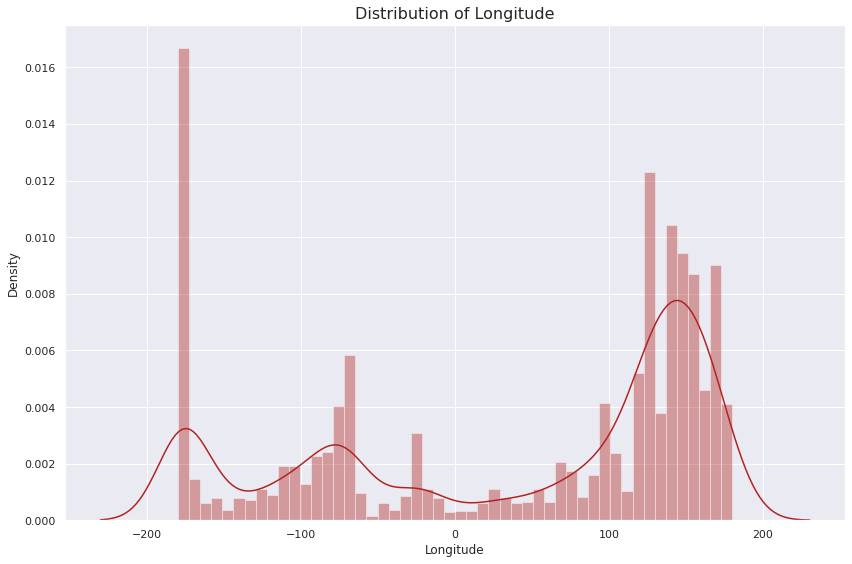

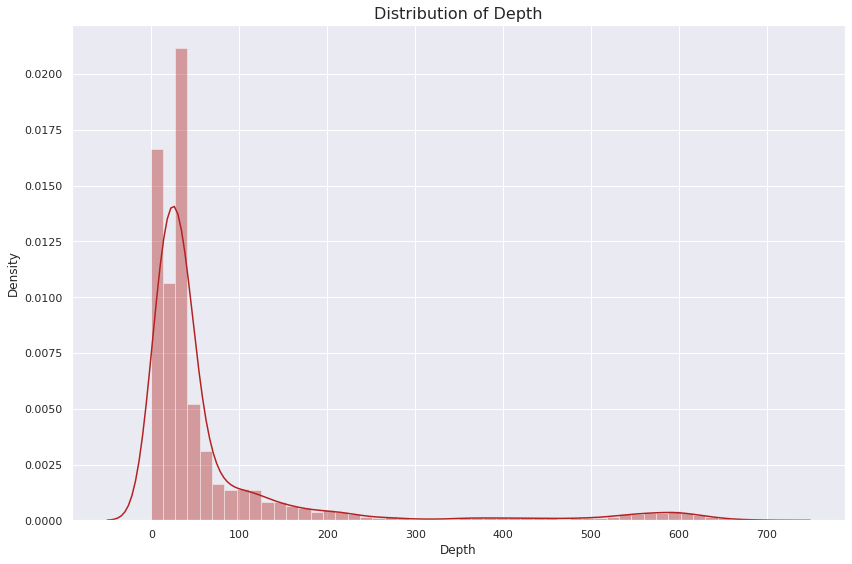

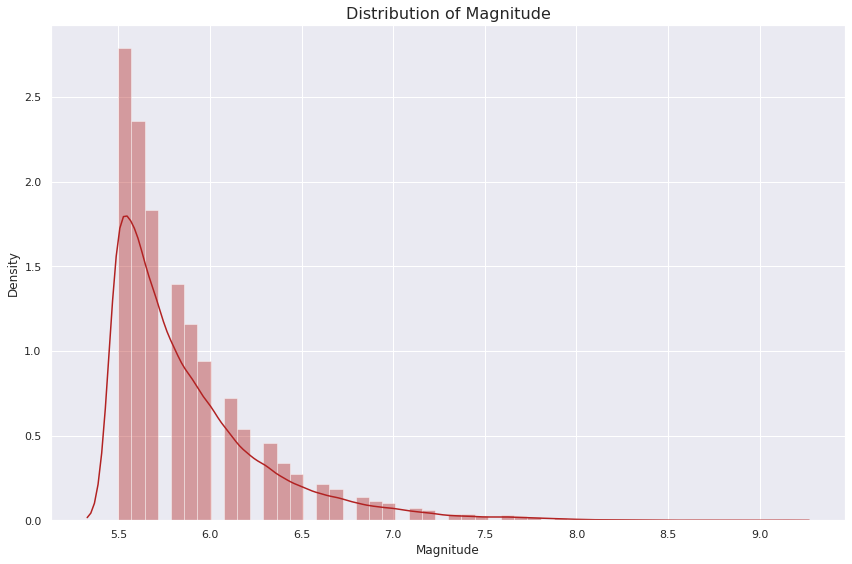

In [ ]:
# Plot the distribution of numerical variables

sns.set_style("darkgrid")

for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(12, 8))
    sns.distplot(df[column], bins=50, color='firebrick')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.tight_layout()
    plt.show()


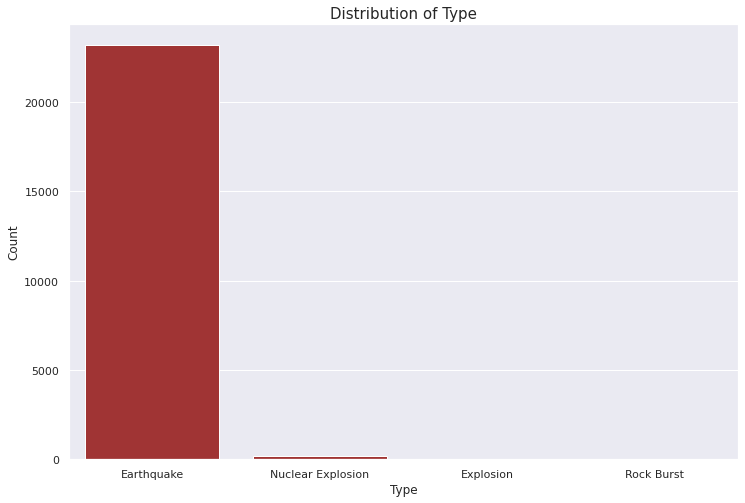

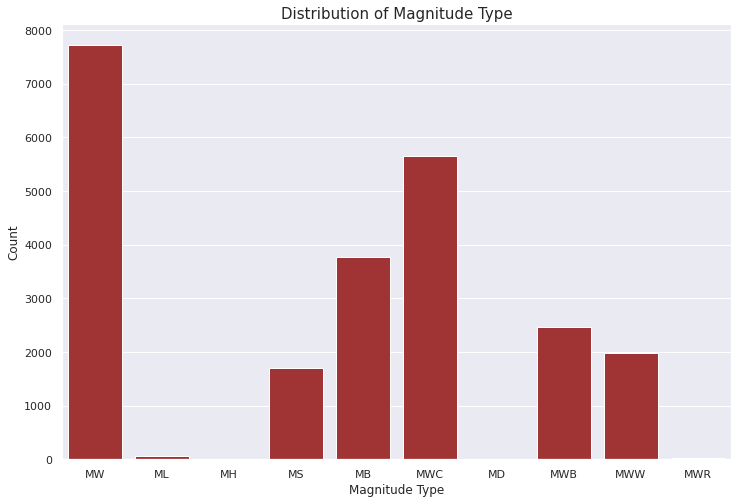

In [ ]:
# Plot the distribution of categorical variables

for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=column, data=df, color='firebrick')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Distribution of {column}', fontsize=15)
    plt.show()


**Findings:**

1. Most of the events have taken place between 10 to 5 degrees south of the equator and 115-175 degrees east of the prime meridian. The least number of earthquakes are along the prime meridian give and take 5 degrees and 75-80 degrees north and south of the equator. This means a lot of earhquakes occur along the prime meridian but away from the equator.
2. The distribution of magnitude and depth is heavily skewed to the right with most events in the range of 5.5-6 magnitude and 0-40 in depth.
3. There are negative values in depth which indicates that earthquakes occurred above the Earth's surface. This can occur in areas where the Earth's surface is unstable, such as those near active volcanic regions, where magma and ash can cause the ground to shake and produce earthquakes.
4. The type of event with the most records in this dataset is earthquakes. We will drop rows with other events since they are only 180 and the goal is to predict earthquakes. 
5. The magnitude type that has the highest frequency is MW followed by MWC

### **Pre-Processing**

In [ ]:
# Check the skewness of 'Magnitude' and 'Depth'

print('Skewness of Magnitude:', df['Magnitude'].skew())
print('Skewness of Depth:', df['Depth'].skew())

Skewness of Magnitude: 1.8500472047368848
Skewness of Depth: 3.287643376513829


Both variables are highly skewed hence we will perform log transformation

In [ ]:
df['Magnitude'] = np.log(df['Magnitude'] + 1)
df['Depth'] = np.log(df['Depth'] + 1)
df.head(2)

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type
Datetime,,,,,,
1965-01-02 13:44:18,19.246,145.616,Earthquake,4.887337,1.945910,MW
1965-01-04 11:29:49,1.863,127.352,Earthquake,4.394449,1.916923,MW


In [ ]:
# Filter the data to only include events with type == "Earthquake"
df = df[df['Type'] == "Earthquake"]
df = df.drop('Type', axis=1) # Dropping the type column since it has earthquakes only

# Define the regions based on latitude and longitude ranges
regions = {
    'North America': [(24, 50), (-125, -60)],
    'South America': [(0, 25), (-90, -30)],
    'Europe': [(35, 70), (-15, 40)],
    'Africa': [(0, 40), (-20, 60)],
    'Asia': [(0, 60), (60, 150)],
    'Oceania': [(-50, 0), (100, 180)],
}

df['Region'] = ''

# Loop through the DataFrame and determine the region for the earthquakes
for i, row in df.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    for region, bounds in regions.items():
        lat_bounds, lon_bounds = bounds
        if lat_bounds[0] < lat < lat_bounds[1] and lon_bounds[0] < lon < lon_bounds[1]:
            df.at[i, 'Region'] = region
            break

# Group the data by region and count the number of earthquakes in each region based on the 'Latitude' variable
region_counts = df.groupby("Region").count()['Latitude']
print('Region Counts:', region_counts )

Region Counts: Region
                 9522
Africa            352
Asia             5908
Europe            333
North America     205
Oceania          6030
South America     844
Name: Latitude, dtype: int64


The highest count of earthquakes were recorded in Oceania with 6032 occurrences, while the lowest count was recorded in Europe with 333 occurrences. These results indicate that earthquakes are more likely to occur in Oceania as compared to other regions. This could be due to several factors such as geological conditions and plate tectonics.

In [ ]:
# Create a Location variable

df['Location'] = df.groupby(['Latitude','Longitude']).ngroup()
print(f'{df.Location.nunique()} unique locations')

23189 unique locations


In [ ]:
# Calculate the geographical distance between consecutive earthquakes,

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return 6371 * 2 * np.arcsin(np.sqrt(a))

# Calculate the new variable 'Distance'
df['Distance'] = haversine_np(df['Longitude'].shift(), df['Latitude'].shift(), df['Longitude'], df['Latitude'])
df['Distance'] = round(df['Distance'], 4)
df.head(3)

,Latitude,Longitude,Depth,Magnitude,Magnitude Type,Region,Location,Distance
Datetime,,,,,,,,
1965-01-02 13:44:18,19.246,145.616,4.887337,1.945910,MW,Asia,16729,NaN
1965-01-04 11:29:49,1.863,127.352,4.394449,1.916923,MW,Asia,13350,2772.5613
1965-01-05 18:05:58,-20.579,-173.972,3.044522,1.974081,MW,,5217,6853.9942


In [ ]:
df['Distance'].describe()

count    23192.000000
mean      7355.308444
std       5360.481033
min          0.000000
25%       2647.235700
50%       7027.367450
75%      11389.711950
max      19841.387800
Name: Distance, dtype: float64

In [ ]:
print('Skewness of Distance:', df['Distance'].skew())

Skewness of Distance: 0.2589498238628681


In [ ]:
# Drop 'Latitude' and 'Longitude'
df = df.drop(['Latitude','Longitude'], axis=1)

# Drop the null row created by the 'Distance' variable
df = df.dropna(axis=0)
df.shape

(23192, 6)

**Temporal Analysis**

In [ ]:
# Create hour, day month and year variables from the 'Datetime' column

df['Hour'] = df.index.hour
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Year'] = df.index.year

df.tail(2)

,Depth,Magnitude,Magnitude Type,Region,Location,Distance,Hour,Day,Month,Year
Datetime,,,,,,,,,,
2016-12-29 22:30:19,4.382027,1.987874,MWW,Oceania,8814,5590.6910,22,29,12,2016
2016-12-30 20:08:28,2.560323,1.871802,MB,Asia,19389,5679.5166,20,30,12,2016


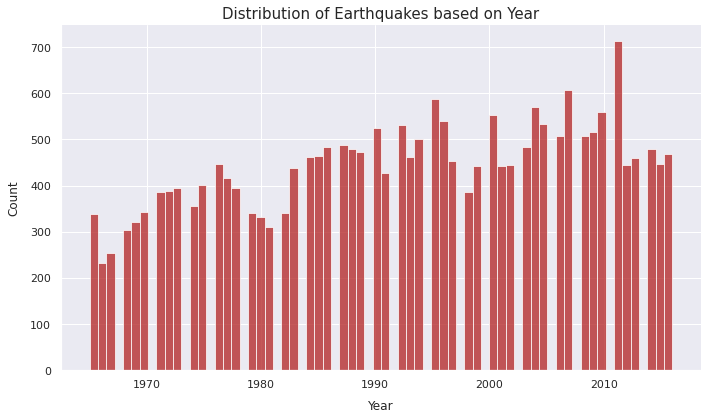

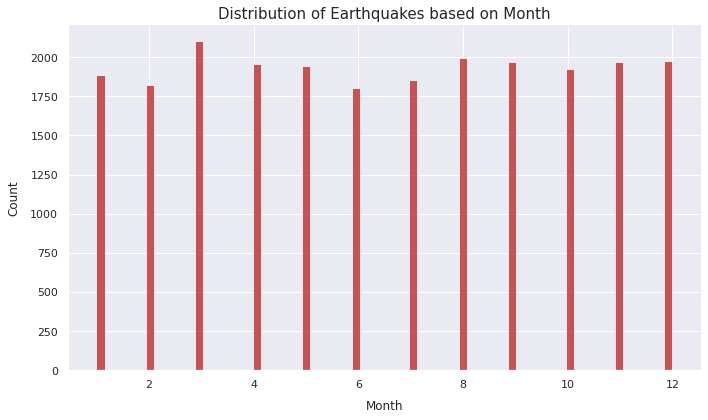

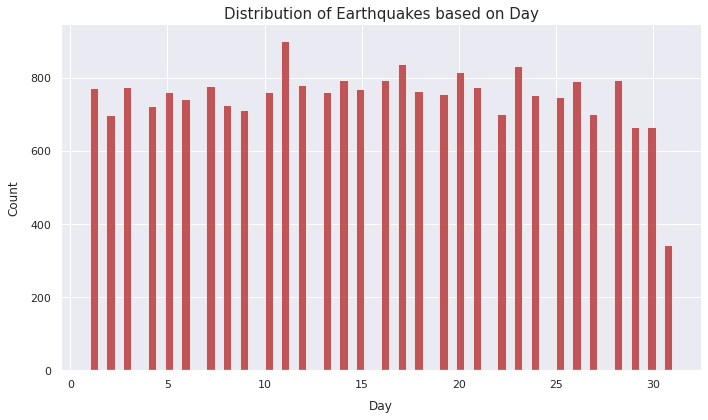

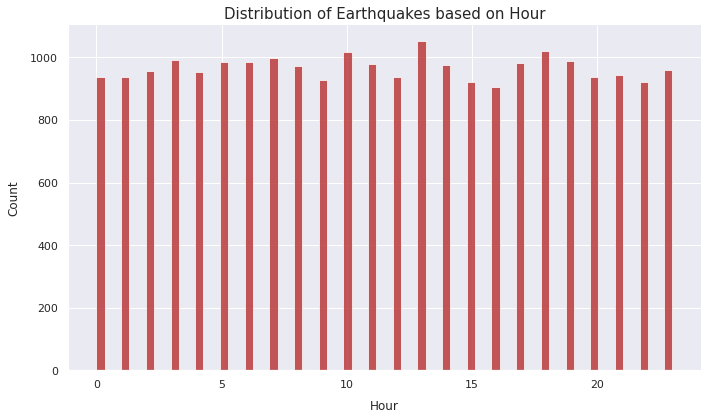

In [ ]:
# Create separate plots for each of the 'Year', 'Month', 'Day' and 'Hour' columns

for column in ['Year', 'Month', 'Day', 'Hour']:
    plt.figure(figsize=(10,6))
    sns.histplot(df[column], bins=70, color='firebrick', kde=False)
    plt.xlabel(column, fontsize=12, labelpad=10)
    plt.ylabel('Count', fontsize=12, labelpad=10)
    plt.title(f'Distribution of Earthquakes based on {column}', fontsize=15)
    plt.tight_layout()
    sns.despine()
    plt.show()


Conclusion:
1. 2011 had the highest number of earthquakes recorded : 713, while the least was 1966 with 233 which would be because there were those not recorded in the earlier years. 
2. March had more records with 2104 cases while June had the least number of cases with 1807. 
3. The 11th day of the month is the most likely to experience an earthquake since it has the highest number with 900, followed by the 17 th day with 840 while the 31st is least likely to have an earthquake since it has 345 cases.
4. The 13 hour of the day is most likely to have an earthquake with 1055 cases while the 16 hour is the least likely with 909 cases.

In [ ]:
df['Magnitude Type'].value_counts()

MW     7717
MWC    5650
MB     3594
MWB    2457
MWW    1983
MS     1700
ML       56
MWR      26
MH        5
MD        4
Name: Magnitude Type, dtype: int64

In [ ]:
# Group categories with frequency less than 1000

other_cutoff = 1000
df['Magnitude Type'] = np.where(df['Magnitude Type'].isin(df['Magnitude Type'].value_counts()[df['Magnitude Type'].value_counts() < other_cutoff].index), 'Other', df['Magnitude Type'])

# Print the reduced categories
print(df['Magnitude Type'].value_counts())


MW       7717
MWC      5650
MB       3594
MWB      2457
MWW      1983
MS       1700
Other      91
Name: Magnitude Type, dtype: int64


In [ ]:
# Find the categorical variables of the data frame

cat_cols = [cname for cname in df.columns if df[cname].dtype not in ['int64', 'float64','datetime64[ns]']]
print(cat_cols)

['Magnitude Type', 'Region']


In [ ]:
# Encode the categorical variables

for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

df.head(3)   

,Depth,Magnitude,Magnitude Type,Region,Location,Distance,Hour,Day,Month,Year
Datetime,,,,,,,,,,
1965-01-04 11:29:49,4.394449,1.916923,2,2,13350,2772.5613,11,4,1,1965
1965-01-05 18:05:58,3.044522,1.974081,2,0,5217,6853.9942,18,5,1,1965
1965-01-08 18:49:43,2.772589,1.916923,2,0,363,10753.6999,18,8,1,1965


In [ ]:
# Creating a variable with the 'Depth' and 'Magnitude' variables

df['magnitude_depth_ratio'] =  df['Magnitude'] / df['Depth'] 
df['depth_magnitude'] = df['Depth'] * df['Magnitude']
df.head(2)

,Depth,Magnitude,Magnitude Type,Region,Location,Distance,Hour,Day,Month,Year,magnitude_depth_ratio,depth_magnitude
Datetime,,,,,,,,,,,,
1965-01-04 11:29:49,4.394449,1.916923,2,2,13350,2772.5613,11,4,1,1965,0.436215,8.423819
1965-01-05 18:05:58,3.044522,1.974081,2,0,5217,6853.9942,18,5,1,1965,0.648404,6.010134
